In [176]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
%matplotlib inline

In [139]:
## read data 
train = pd.read_csv('/Users/xingobar/Downloads/leaf_train.csv')
test = pd.read_csv('/Users/xingobar/Downloads/leaf_test_2.csv')

In [140]:
def label_encode(train,test):
    le = LabelEncoder().fit(train.species)
    labels = le.transform(train.species)
    test_ids = test['id']
    test.drop(['id'],axis=1,inplace=True)
    #test_label = le.transform(test)
    classes = list(le.classes_)
    train.drop(['id','species'],axis=1,inplace=True)
    return train,test,test_ids,classes,labels

In [141]:
train,test,test_ids,classes,labels = label_encode(train,test)
train.head(5)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [142]:
sss = StratifiedShuffleSplit(labels,n_iter=10,test_size=0.2,random_state=42)
for train_index,test_index in sss:
    X_train,X_test = train.values[train_index],train.values[test_index]
    y_train,y_test = labels[train_index],labels[test_index]

In [143]:
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [169]:
classifiers = [
    SVC(kernel='rbf',C=0.02,probability=True),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(n_estimators=300),
    KNeighborsClassifier(3),
]
log_cols = ['Name','Accuracy','log_loss']
log = pd.DataFrame(columns=log_cols)
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    name = classifier.__class__.__name__
    print '-'*50
    print name
    print 'Prediction Results'
    y_hat = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_hat)
    print 'Accuracy : %.2f' %(accuracy)
    y_hat = classifier.predict_proba(X_test)
    loss = log_loss(y_test,y_hat)
    print 'Log Loass : %.5f' %(loss)
    entry = pd.DataFrame([[name,accuracy,loss]],columns=log_cols)
    log = log.append(entry)
print '-'*50

--------------------------------------------------
SVC
Prediction Results
Accuracy : 0.79
Log Loass : 4.62859
--------------------------------------------------
DecisionTreeClassifier
Prediction Results
Accuracy : 0.66
Log Loass : 11.86180
--------------------------------------------------
AdaBoostClassifier
Prediction Results
Accuracy : 0.03
Log Loass : 4.57491
--------------------------------------------------
GradientBoostingClassifier
Prediction Results
Accuracy : 0.56
Log Loass : 2.79980
--------------------------------------------------
RandomForestClassifier
Prediction Results
Accuracy : 0.99
Log Loass : 0.76785
--------------------------------------------------
KNeighborsClassifier
Prediction Results
Accuracy : 0.90
Log Loass : 1.57293
--------------------------------------------------


In [124]:
log

,Name,Accuracy,log_loss
0,SVC,0.792929,4.606676
0,DecisionTreeClassifier,0.666667,11.512925
0,AdaBoostClassifier,0.030303,4.574923
0,GradientBoostingClassifier,0.585859,2.501123
0,RandomForestClassifier,0.893939,0.962370
0,KNeighborsClassifier,0.904040,1.572933


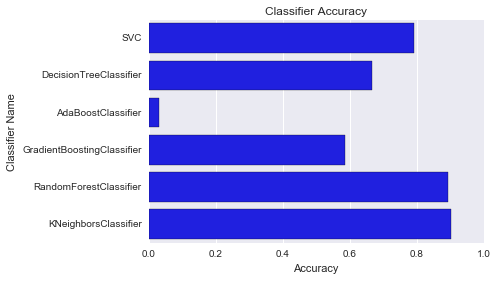

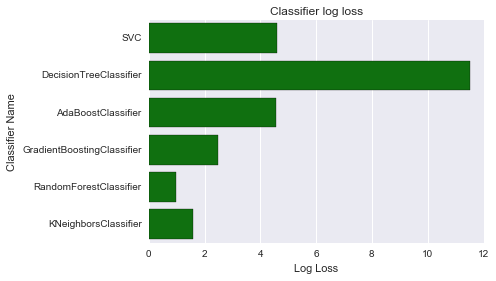

In [125]:
sns.barplot(x='Accuracy',y='Name',data = log , color='b')
plt.title('Classifier Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Classifier Name')
plt.show()
sns.barplot(x='log_loss',y='Name',data=log,color='g')
plt.title('Classifier log loss')
plt.ylabel('Classifier Name')
plt.xlabel('Log Loss')
plt.show()

In [173]:
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train,y_train)
prediction = clf.predict_proba(test.values)
submission = pd.DataFrame(prediction , columns=classes)
submission.insert(0,'id',test_ids)

In [174]:
submission.reset_index()
submission.head()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.000000,0.000000,0.003333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003333,0.000000,0.000000,0.000000,0.010000,0.000000
1,7,0.000000,0.000000,0.043333,0.026667,0.010000,0.006667,0.036667,0.006667,0.000000,...,0.003333,0.003333,0.000000,0.000000,0.000000,0.006667,0.006667,0.023333,0.000000,0.006667
2,9,0.003333,0.560000,0.003333,0.000000,0.070000,0.010000,0.000000,0.010000,0.020000,...,0.000000,0.000000,0.000000,0.003333,0.000000,0.000000,0.006667,0.000000,0.000000,0.003333
3,12,0.000000,0.033333,0.006667,0.016667,0.003333,0.000000,0.003333,0.006667,0.023333,...,0.010000,0.000000,0.006667,0.000000,0.000000,0.033333,0.053333,0.010000,0.000000,0.026667
4,13,0.013333,0.036667,0.000000,0.000000,0.000000,0.000000,0.000000,0.003333,0.090000,...,0.003333,0.000000,0.010000,0.000000,0.010000,0.010000,0.023333,0.000000,0.003333,0.010000


In [175]:
submission.to_csv('leaf_classification.csv',index=False)